# Mini Projeto 2

Processo de Construção, Treinamento, Avaliação e Seleção de Modelos de Regressão

In [1]:
# Importando bibliotecas:
from platform import python_version
print('Versão Python:', python_version(), '\n')

import numpy as np # Para manipulação de arrays
import pandas as pd # Para manipulação de dataframes
import seaborn as sns # Para visualização de dados
from matplotlib import pyplot as plt # Para visualização de dados
import sklearn # Para machine learning
from sklearn.model_selection import train_test_split # Para divisão dos dados
from sklearn.preprocessing import StandardScaler # Para normalização dos dados
from sklearn.linear_model import LinearRegression # Para modelo de regressão linear
from sklearn.linear_model import Ridge # Para modelo de regressão Ridge
from sklearn.linear_model import Lasso # Para modelo de regressão Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score # Para métricas de avaliação

sns.set_style('darkgrid') # Estilo dos gráficos

import warnings
warnings.filterwarnings('ignore') # Ignorar warnings

%reload_ext watermark
%watermark -a "gustavogzr" --iversions

Versão Python: 3.11.1 

Author: gustavogzr

numpy     : 1.25.2
matplotlib: 3.7.2
pandas    : 2.0.3
sklearn   : 1.3.0
seaborn   : 0.12.2



## Carregando os dados

In [3]:
# Carrega o dataset:
dados = pd.read_csv('.arquivos_DSA/dados/dataset.csv')
dados.sample(5)

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
132,2.476139,32.491447,12.530357,37.875219,449.070319
315,5.453969,33.551699,12.158585,36.575134,640.786166
245,3.088764,31.047222,11.199661,38.688709,392.497399
233,3.308443,32.712512,11.724474,37.153152,476.766724
412,3.561215,33.593964,11.520567,36.189132,474.532329


In [4]:
dados.shape

(500, 5)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tempo_cadastro_cliente           500 non-null    float64
 1   numero_medio_cliques_por_sessao  500 non-null    float64
 2   tempo_total_logado_app           500 non-null    float64
 3   tempo_total_logado_website       500 non-null    float64
 4   valor_total_gasto                500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


## Análise Exploratória dos Dados

In [6]:
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

Em regressão, esperamos que as variáveis preditoras tenham uma boa correlação com a variável alvo. No entanto, a correlação entre as variáveis preditoras também pode ser um problema, pois a multicolinearidade pode prejudicar a interpretação dos coeficientes do modelo.

In [8]:
# Correlação entre as variáveis:
dados.corr()

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
tempo_cadastro_cliente,1.000000,0.060247,0.029143,-0.047582,0.809084
numero_medio_cliques_por_sessao,0.060247,1.000000,-0.027826,-0.034987,0.355088
tempo_total_logado_app,0.029143,-0.027826,1.000000,0.082388,0.499328
tempo_total_logado_website,-0.047582,-0.034987,0.082388,1.000000,-0.002641
valor_total_gasto,0.809084,0.355088,0.499328,-0.002641,1.000000


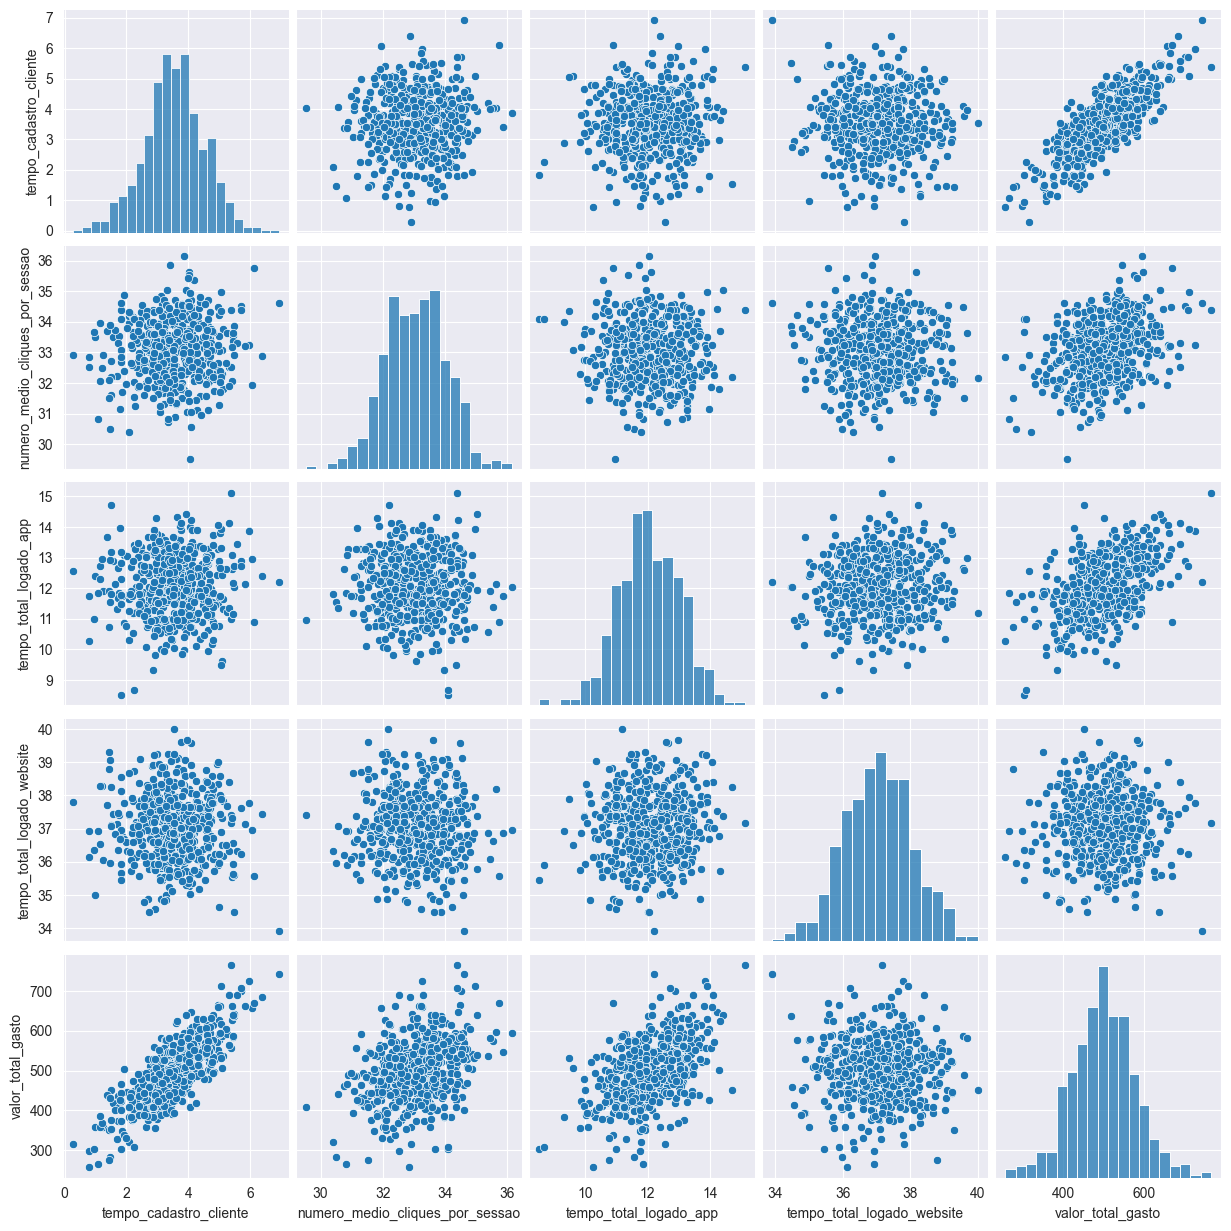

In [10]:
# Correlação (visualização):
sns.pairplot(dados)
plt.show()

In [14]:
# Calcular skewness para cada coluna:
print('Quanto mais próximo de 0, mais simétrica é a distribuição.\n')
for coluna in dados.columns:
    print(f'{coluna}: {dados[coluna].skew()}')

# Calcular kurtosis para cada coluna:
print('\nQuanto mais próximo de 0, mais semelhante à distribuição normal é a distribuição.\n')
for coluna in dados.columns:
    print(f'{coluna}: {dados[coluna].kurt()}')

Quanto mais próximo de 0, mais simétrica é a distribuição.

tempo_cadastro_cliente: -0.10660805308554401
numero_medio_cliques_por_sessao: -0.03217480701105855
tempo_total_logado_app: -0.08912109679800799
tempo_total_logado_website: 0.012141880955778936
valor_total_gasto: 0.03479018401676138

Quanto mais próximo de 0, mais semelhante à distribuição normal é a distribuição.

tempo_cadastro_cliente: 0.34900978626809254
numero_medio_cliques_por_sessao: 0.011861628193921891
tempo_total_logado_app: 0.12508120992947713
tempo_total_logado_website: -0.09828690044040345
valor_total_gasto: 0.46397553223805543


### Análise 1: Relação entre Tempo no Website e Valor Gasto

<Figure size 1200x600 with 0 Axes>

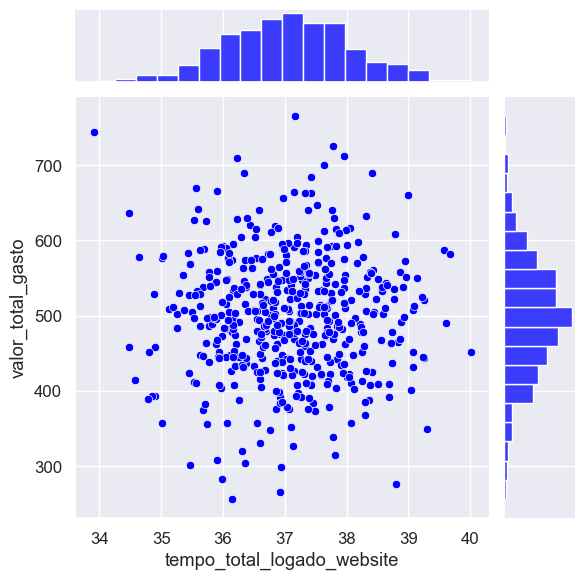

In [17]:
# Plot
plt.figure(figsize=(12, 6))
sns.set(font_scale=1.1)
sns.jointplot( # Gráfico de dispersão com histogramas nas margens
    data = dados,
    x = 'tempo_total_logado_website',
    y = 'valor_total_gasto',
    color = 'blue'
)
plt.show()

In [18]:
# Correlação entre as variáveis:
dados[['tempo_total_logado_website', 'valor_total_gasto']].corr() # selecionando apenas as colunas de interesse

,tempo_total_logado_website,valor_total_gasto
tempo_total_logado_website,1.000000,-0.002641
valor_total_gasto,-0.002641,1.000000


Parece não haver uma relação clara entre o tempo no website e o valor gasto.

### Análise 2: Relação entre Tempo no App e Valor Gasto

<Figure size 1200x600 with 0 Axes>

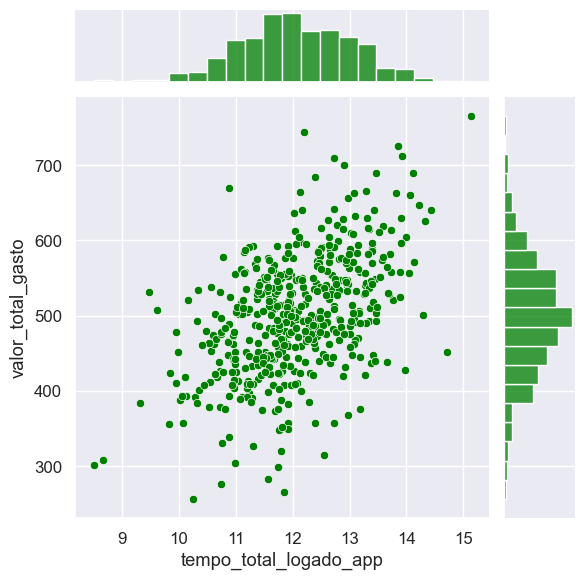

In [20]:
# Plot:
plt.figure(figsize=(12, 6))
sns.set(font_scale=1.1)
sns.jointplot(
    data = dados,
    x = 'tempo_total_logado_app',
    y = 'valor_total_gasto',
    color = 'green'
)
plt.show()

In [21]:
# Correlação entre as variáveis:
dados[['tempo_total_logado_app', 'valor_total_gasto']].corr() # selecionando apenas as colunas de interesse

,tempo_total_logado_app,valor_total_gasto
tempo_total_logado_app,1.000000,0.499328
valor_total_gasto,0.499328,1.000000


Existe uma correlação positiva moderada entre o tempo no app e o valor gasto.

### Análise 3: Relação entre Tempo no App e Tempo de Cadastro

<Figure size 1200x500 with 0 Axes>

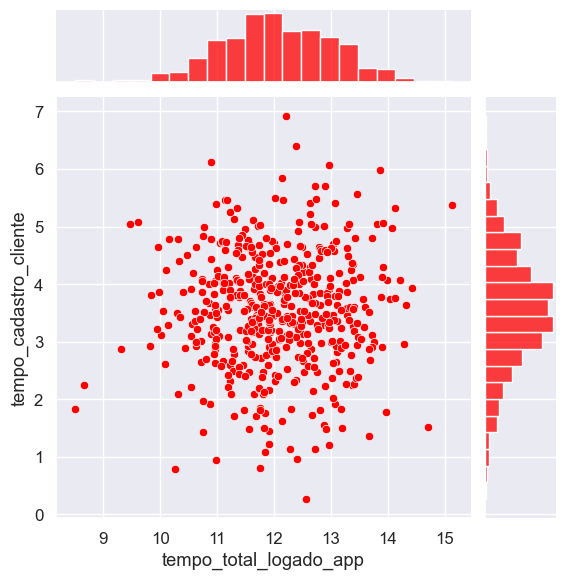

In [24]:
# Plot:
plt.figure(figsize=(12, 5))
sns.set(font_scale=1.1)
sns.jointplot(
    data = dados,
    x = 'tempo_total_logado_app',
    y = 'tempo_cadastro_cliente',
    color = 'red'
)
plt.show()

In [25]:
# Correlação entre as variáveis:
dados[['tempo_total_logado_app', 'tempo_cadastro_cliente']].corr() # selecionando apenas as colunas de interesse

,tempo_total_logado_app,tempo_cadastro_cliente
tempo_total_logado_app,1.000000,0.029143
tempo_cadastro_cliente,0.029143,1.000000


Parece não haver uma relação clara entre o tempo no app e o tempo de cadastro.

### Análise 4: Relação entre Tempo de Cadastro e Valor Gasto

<Figure size 1200x500 with 0 Axes>

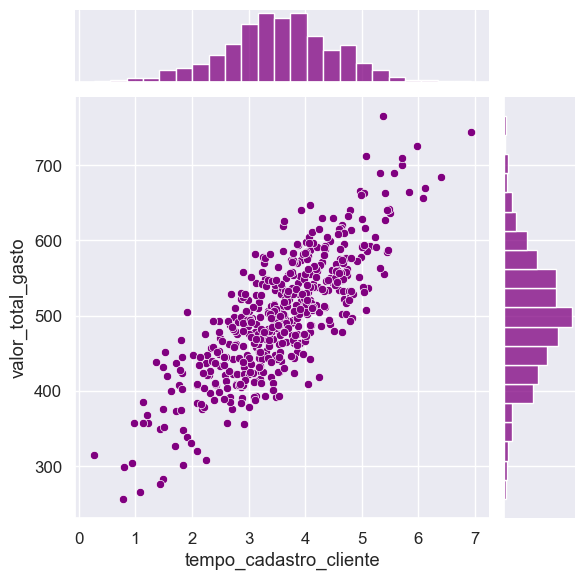

In [27]:
# Plot:
plt.figure(figsize=(12, 5))
sns.set(font_scale=1.1)
sns.jointplot(
    data = dados,
    x = 'tempo_cadastro_cliente',
    y = 'valor_total_gasto',
    color = 'purple'
)
plt.show()

<Figure size 1200x600 with 0 Axes>

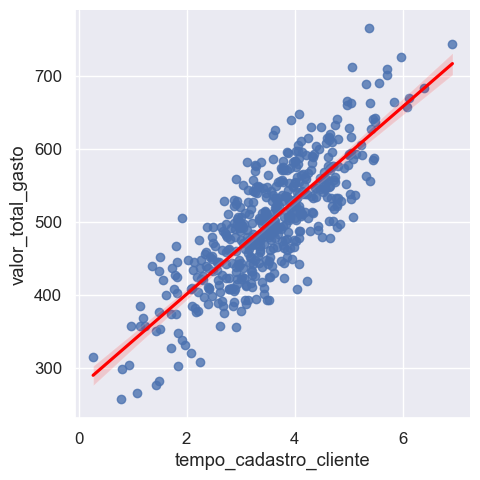

In [36]:
# Plot via lmplot (com linha de regressão):
plt.figure(figsize=(12, 6))
sns.set(font_scale=1.1)
sns.lmplot(
    data = dados,
    x = 'tempo_cadastro_cliente',
    y = 'valor_total_gasto',
    line_kws={'color': 'red'} # Cor da linha de regressão
)
plt.show()

In [28]:
# Correlação entre as variáveis:
dados[['tempo_cadastro_cliente', 'valor_total_gasto']].corr() # selecionando apenas as colunas de interesse

,tempo_cadastro_cliente,valor_total_gasto
tempo_cadastro_cliente,1.000000,0.809084
valor_total_gasto,0.809084,1.000000


Verificamos que existe uma forte correlação positiva entre o tempo de cadastro e o valor gasto.

### Análise 5: Relação entre Tempo Logado no APP e Tempo Logado no Website

<Figure size 1200x600 with 0 Axes>

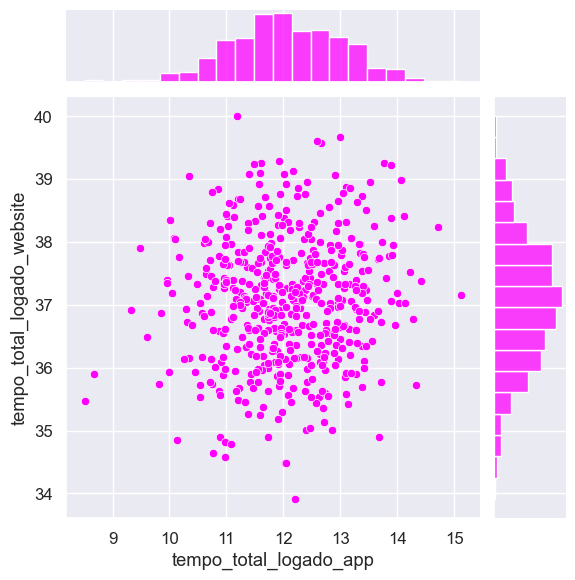

In [40]:
# Plot:
plt.figure(figsize=(12, 6))
sns.set(font_scale=1.1)
sns.jointplot(
    data = dados,
    x = 'tempo_total_logado_app',
    y = 'tempo_total_logado_website',
    color = 'magenta'
)
plt.show()

In [41]:
# Correlação entre as variáveis:
dados[['tempo_total_logado_app', 'tempo_total_logado_website']].corr() # selecionando apenas as colunas de interesse

,tempo_total_logado_app,tempo_total_logado_website
tempo_total_logado_app,1.000000,0.082388
tempo_total_logado_website,0.082388,1.000000


Não detectamos uma relação clara entre o tempo logado no app e o tempo logado no website.

## Pré-processamento dos Dados para Construção do Modelo de Regressão (Machine Learning)

In [43]:
# Definindo as variáveis independentes (X) e a variável dependente (y):
X = dados[['tempo_cadastro_cliente',
           'numero_medio_cliques_por_sessao',
           'tempo_total_logado_app',
           'tempo_total_logado_website']]
y = dados['valor_total_gasto']

In [44]:
# Dividir os dados em treino e teste:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=101)
print('Quantidade de dados para treino:', len(X_treino))
print('Quantidade de dados para teste:', len(X_teste))

Quantidade de dados para treino: 350
Quantidade de dados para teste: 150


### Padronização dos Dados

Como os dados das variáveis preditoras estão em escalas similiares, não precisamos padronizá-los. Mas, para garantir que o modelo seja treinado de forma mais eficiente, vamos padronizá-los.

In [46]:
scaler = StandardScaler() # Instanciando o objeto StandardScaler
scaler.fit(X_treino) # Ajustando o objeto aos dados de treino
X_treino = scaler.transform(X_treino) # Normalizando os dados de treino
X_teste = scaler.transform(X_teste) # Normalizando os dados de teste

In [48]:
X_treino[:5] # Visualizando os dados normalizados

array([[-0.21902935, -0.23735512,  0.33914084,  0.92765292],
       [ 1.8073082 ,  0.09393489,  1.05266311,  0.2388907 ],
       [-0.00962736, -0.47064535, -0.26005737,  0.81461639],
       [-0.06171807, -0.23157636, -0.19229742, -0.26198867],
       [-2.03669802, -1.54671013, -1.27813419,  1.65800995]])

In [49]:
X_teste[:5] # Visualizando os dados normalizados

array([[-0.74134552,  0.35042401,  1.32428694,  0.85663193],
       [ 0.51634261,  0.33850011,  1.36472848,  0.1071885 ],
       [ 1.22462847, -0.84278168,  1.70184401,  0.88678948],
       [ 0.48199668, -0.30436824, -0.65228214, -1.76956776],
       [ 1.88519232, -0.14493923,  0.70658414, -1.44006612]])

## Construção dos Modelos de Regressão

### Modelo 1: Regressão Linear (Benchmark)

Iremos realizar a regressão linear múltipla para prever o valor gasto com base nas variáveis preditoras. O modelo de regressão linear é um modelo simples e fácil de interpretar, mas pode não ser suficiente para capturar a complexidade dos dados.

In [54]:
# Modelo de regressão linear:
modelo_v1 = LinearRegression(n_jobs=-1) # Instanciando o modelo de regressão linear. 
# O parâmetro n_jobs=-1 permite que o modelo utilize todos os núcleos do processador.
modelo_v1.fit(X_treino, y_treino) # Treinando o modelo

LinearRegression(n_jobs=-1)

In [56]:
print('Coeficientes:', modelo_v1.coef_) # Coeficientes
print('Intercept:', modelo_v1.intercept_) # Intercept

Coeficientes: [63.74220716 26.23901606 38.57185551  0.6847366 ]
Intercept: 499.45774467


In [57]:
# Coeficiente das variáveis preditoras:
df_coef = pd.DataFrame(modelo_v1.coef_, X.columns, columns=['Coeficientes'])
df_coef

,Coeficientes
tempo_cadastro_cliente,63.742207
numero_medio_cliques_por_sessao,26.239016
tempo_total_logado_app,38.571856
tempo_total_logado_website,0.684737


In [58]:
# Avaliando o modelo:
pred_v1 = modelo_v1.predict(X_teste) # Realizando previsões
pred_v1[:5] # Visualizando as previsões

array([513.06429807, 593.96597774, 621.6550031 , 495.82353395,
       642.08919639])

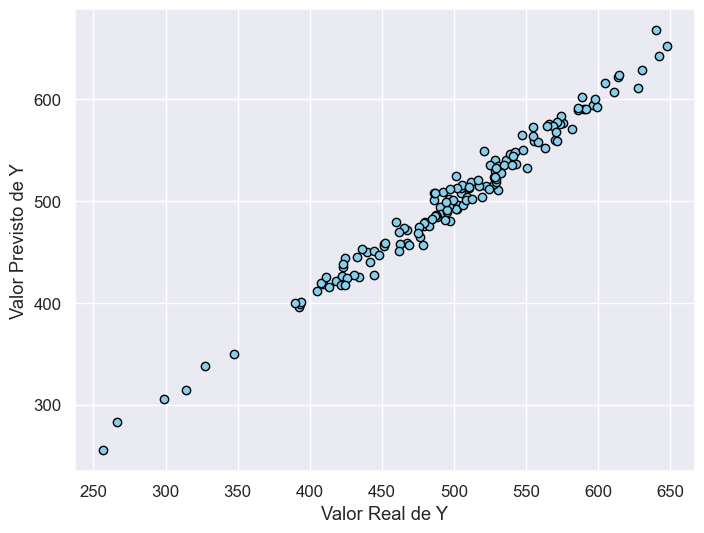

In [61]:
# Plot y e y_pred:
plt.figure(figsize=(8,6))
plt.scatter(
    x = y_teste,
    y = pred_v1,
    color = 'skyblue',
    edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

A partir do gráfico de dispersão acima, podemos verificar que existe uma forte correlação entre o valor real de y e o valor previsto de y. Isso sugere que o modelo de regressão linear é capaz de capturar a relação entre as variáveis preditoras e a variável alvo.

In [62]:
# Valor médio gasto pelos clientes:
print('Valor médio gasto pelos clientes:', dados['valor_total_gasto'].mean())
# Valor mínimo gasto pelos clientes:
print('Valor mínimo gasto pelos clientes:', dados['valor_total_gasto'].min())
# Valor máximo gasto pelos clientes:
print('Valor máximo gasto pelos clientes:', dados['valor_total_gasto'].max())

Valor médio gasto pelos clientes: 499.31403826080003
Valor mínimo gasto pelos clientes: 256.6705823
Valor máximo gasto pelos clientes: 765.5184619


In [63]:
# Calcular o MAE (Mean Absolute Error - Erro Médio Absoluto):
mean_absolute_error(y_teste, pred_v1)

7.762418645778983

O MAE prevê que, em média, o modelo de regressão linear erra em $7.76 ao prever o valor gasto. Este valor é relativamente pequeno se comparado com o valor médio gasto de $499.31.

In [64]:
# Calcular o MSE (Mean Squared Error - Erro Médio Quadrático):
mean_squared_error(y_teste, pred_v1)

94.95654308438668

In [65]:
# Calculando o RMSE (Root Mean Squared Error - Raiz do Erro Médio Quadrático):
np.sqrt(mean_squared_error(y_teste, pred_v1))

9.74456479707466

O RMSE prevê que, em média, o modelo de regressão linear erra em $9.74 ao prever o valor gasto. Este valor é relativamente pequeno se comparado com o valor médio gasto de $499.31.

In [66]:
# Coeficiente de determinação (R²):
r2_score(y_teste, pred_v1)
# quanto mais próximo de 1, melhor

0.9813622791776302

In [67]:
# Variância explicada:
explained_variance_score(y_teste, pred_v1)
# quanto mais próximo de 1, melhor

0.9817449183428639

O modelo é capaz de explicar 98,2% da variabilidade dos dados.

O coeficiente de determinação (R²) e as outras métricas demonstram que o modelo é muito bom. Será que é possível melhorar?

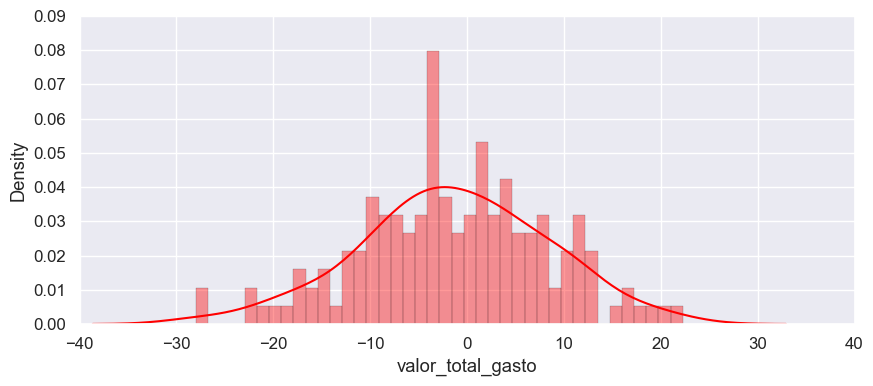

In [74]:
# Calculando resíduos:
# Resíduos = valor real - valor previsto
# Os resíduos devem ser distribuídos conforme uma distribuição normal
# Plot
plt.figure(figsize=(10, 4))
ax = sns.distplot((y_teste - pred_v1), # distplot = histograma + estimativa de densidade de kernel
                  bins=40,
                  color='red',
                  hist_kws = dict(edgecolor="black", linewidth=0.3))
ax.set(xlim=(-40, 40))
ax.set(ylim=(0, 0.09))
plt.show()

A distribuição dos resíduos parece ser normal, o que sugere que o modelo de regressão linear é apropriado para os dados.

### Modelo 2: Regressão Ridge

In [75]:
# Modelo de regressão Ridge:
modelo_v2 = Ridge(alpha=1.0) # Instanciando o modelo de regressão Ridge. O parâmetro alpha é o fator de regularização.
modelo_v2.fit(X_treino, y_treino) # Treinando o modelo

Ridge()

In [76]:
# Coeficientes:
print('Coeficientes:', modelo_v2.coef_)

Coeficientes: [63.57245999 26.17198131 38.46758178  0.68013543]


In [77]:
# Coeficientes das variáveis preditoras:
df_coef = pd.DataFrame(modelo_v2.coef_, X.columns, columns=['Coeficientes'])
df_coef

,Coeficientes
tempo_cadastro_cliente,63.572460
numero_medio_cliques_por_sessao,26.171981
tempo_total_logado_app,38.467582
tempo_total_logado_website,0.680135


In [78]:
# Calculando as previsões:
pred_v2 = modelo_v2.predict(X_teste) # Realizando previsões
print('Previsões:', pred_v2[:5])

Previsões: [513.02461894 593.71284026 621.32208364 495.83827761 641.71185412]


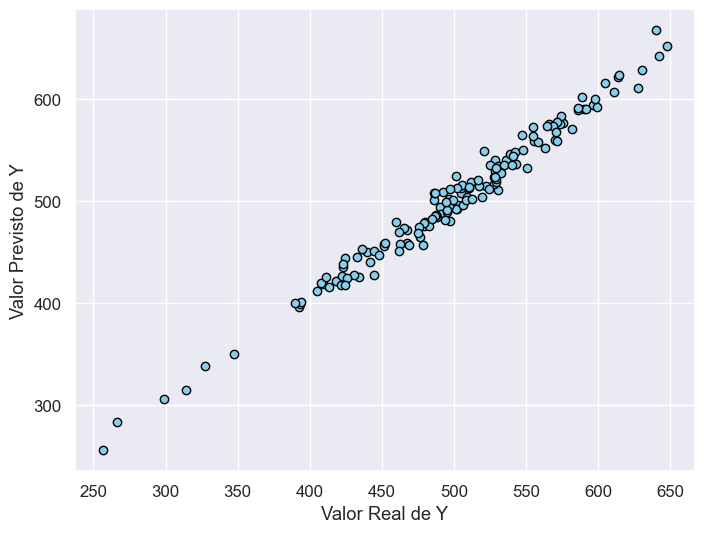

In [79]:
# Plot de y e y_pred:
plt.figure(figsize=(8,6))
plt.scatter(
    x = y_teste,
    y = pred_v2,
    color = 'skyblue',
    edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

In [82]:
# Calculando o MAE (Mean Absolute Error - Erro Médio Absoluto):
print('MAE:',mean_absolute_error(y_teste, pred_v2))
# Calculando o MSE (Mean Squared Error - Erro Médio Quadrático):
print('MSE:',mean_squared_error(y_teste, pred_v2))
# Calculando o RMSE (Root Mean Squared Error - Raiz do Erro Médio Quadrático):
print('RMSE:',np.sqrt(mean_squared_error(y_teste, pred_v2)))
# Coeficiente de determinação (R²):
print('R² (coeficiente de determinação):',r2_score(y_teste, pred_v2))
# Variância explicada:
print('Variância explicada:',explained_variance_score(y_teste, pred_v2))

MAE: 7.764151148981961
MSE: 94.93731602493467
RMSE: 9.7435781941202
R² (coeficiente de determinação): 0.981366052994101
Variância explicada: 0.9817472659016085


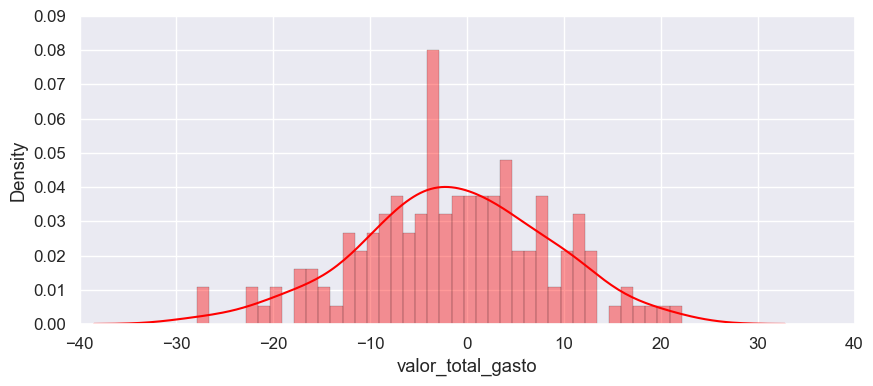

In [84]:
# Plot do histograma dos resíduos:
plt.figure(figsize=(10, 4))
ax = sns.distplot((y_teste - pred_v2), 
                  bins=40,
                  color='red', 
                  hist_kws = dict(edgecolor="black", linewidth=0.3))
ax.set(xlim=(-40, 40))
ax.set(ylim=(0, 0.09))
plt.show()

### Modelo 3: Regressão Lasso

In [85]:
# Modelo de regressão Lasso:
modelo_v3 = Lasso(alpha=1.0) # Instanciando o modelo de regressão Lasso. O parâmetro alpha é o fator de regularização.
modelo_v3.fit(X_treino, y_treino) # Treinando o modelo

Lasso()

In [86]:
# Coeficientes:
print('Coeficientes:', modelo_v3.coef_)

Coeficientes: [62.86344076 25.18747244 37.62149243  0.        ]


In [87]:
# Coeficientes das variáveis preditoras:
df_coef = pd.DataFrame(modelo_v3.coef_, X.columns, columns=['Coeficientes'])
df_coef

,Coeficientes
tempo_cadastro_cliente,62.863441
numero_medio_cliques_por_sessao,25.187472
tempo_total_logado_app,37.621492
tempo_total_logado_website,0.000000


In [88]:
# Previsões com dados de teste:
pred_v3 = modelo_v3.predict(X_teste) # Realizando previsões
print('Previsões:', pred_v3[:5])

Previsões: [511.50216083 591.78590214 619.24047552 497.55162062 640.89951717]


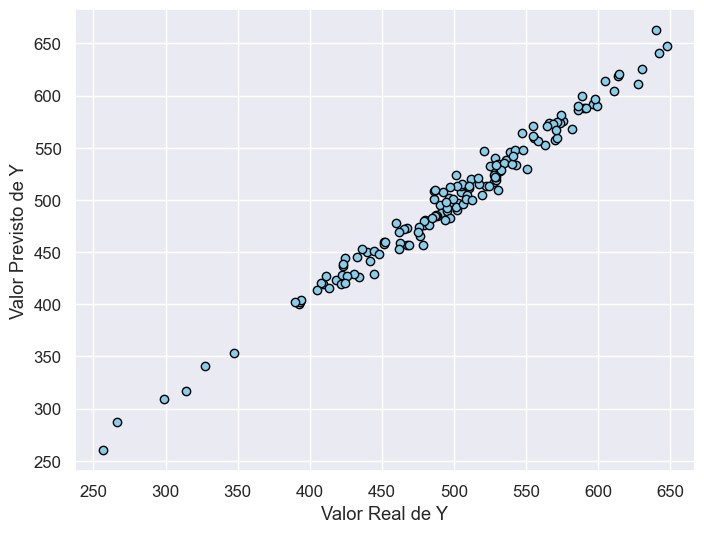

In [89]:
# Plot dos valores reais e previstos:
plt.figure(figsize=(8,6))
plt.scatter(
    x = y_teste,
    y = pred_v3,
    color = 'skyblue',
    edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')
plt.show()

In [90]:
# Calculando o MAE (Mean Absolute Error - Erro Médio Absoluto):
print('MAE:',mean_absolute_error(y_teste, pred_v3))
# Calculando o MSE (Mean Squared Error - Erro Médio Quadrático):
print('MSE:',mean_squared_error(y_teste, pred_v3))
# Calculando o RMSE (Root Mean Squared Error - Raiz do Erro Médio Quadrático):
print('RMSE:',np.sqrt(mean_squared_error(y_teste, pred_v3)))
# Coeficiente de determinação (R²):
print('R² (coeficiente de determinação):',r2_score(y_teste, pred_v3))
# Variância explicada:
print('Variância explicada:',explained_variance_score(y_teste, pred_v3))

MAE: 7.7885046969510645
MSE: 96.05606348970672
RMSE: 9.800819531534428
R² (coeficiente de determinação): 0.981146469358873
Variância explicada: 0.9815600649101045


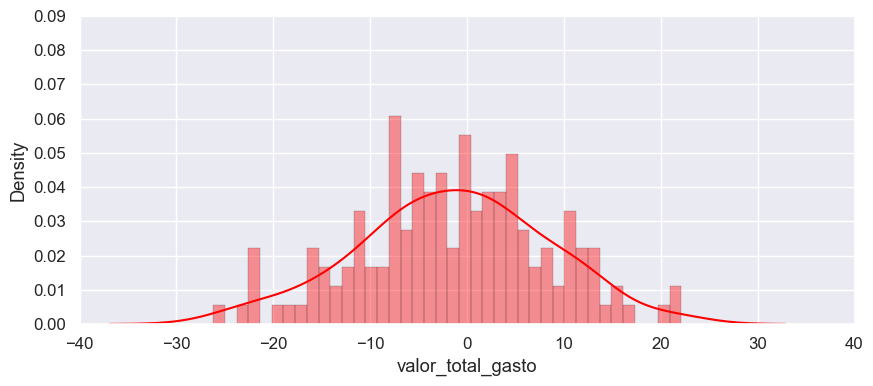

In [92]:
# Plot do histograma dos resíduos:
plt.figure(figsize=(10, 4))
ax = sns.distplot((y_teste - pred_v3), 
                  bins=40,
                  color='red', 
                  hist_kws = dict(edgecolor="black", linewidth=0.3))
ax.set(xlim=(-40, 40))
ax.set(ylim=(0, 0.09))
plt.show()

## Seleção do Modelo de Regressão

O modelo 3 apresentou uma taxa de erro (RMSE) levemente maior que os outros modelos, portanto será descartado.

Os modelos 1 e 2 apresentaram taxas de erro muito similares e, neste caso, selecionaremos o modelo 1, visto que este é mais simples e mais fácil de interpretar.

## Conclusão

In [93]:
dados.head()

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
0,3.472021,33.119954,12.953263,37.034280,534.771485
1,4.198349,35.371876,10.572467,36.862183,537.915753
2,2.086348,33.976083,11.658037,37.425279,407.876378
3,3.605934,34.034164,13.592513,36.838657,618.845970
4,4.034386,32.770492,11.371767,35.261498,502.771075


In [94]:
# Apresentando os coeficientes do modelo de regressão linear (modelo_v1):
df_coef = pd.DataFrame(modelo_v1.coef_, X.columns, columns=['Coeficientes'])
df_coef

,Coeficientes
tempo_cadastro_cliente,63.742207
numero_medio_cliques_por_sessao,26.239016
tempo_total_logado_app,38.571856
tempo_total_logado_website,0.684737


**Interpretação dos Coeficientes do Modelo de Regressão Linear**

- Mantendo todos os outros recursos fixos, um aumento de 1 unidade no Tempo de Cadastro do Cliente estará associado a um aumento de $63,74 no valor total por cliente por mês.

- Matendo todos os outros recursos fixos, um aumento de 1 unidade no Número Médio de Cliques por Sessão está associado a um aumento de $26,24 no valor total por cliente por mês.

- Mantendo todos os outros recursos fixos, um aumento de 1 unidade no Tempo Total Logado no App está associado a um aumento de $38,57 no valor total por cliente por mês.

- Mantendo todos os outros recursos fixos, um aumento de 1 unidade no Tempo Total Logado no Website está associado a um aumento de $0,68 no valor total por cliente por mês.

**Resposta à Pergunta de Negócio**

Podemos verificar que será mais lucrativo investir na atualização do APP, uma vez que o retorno é maior em relação ao website. Além disso, é importante criar políticas de retenção de clientes, visto que o tempo de cadastro é um fator predominante para o aumento do valor gasto. A própria atualização do APP poderá ser uma estratégia para reter clientes por mais tempo.

Não compensa, neste momento, investir em melhorias no website, visto que o retorno é extremamente baixo para a empresa.